<!-- Define CSS styles -->
<style>
  /* Title Style */
  .title {
    font-family: 'Quicksand', sans-serif;
    font-weight: 900; /* Increased boldness */
    font-size: 50px;  /* Increased size */
    color: #333;
    margin-bottom: 20px;
    text-align: center; /* Optional: center-align the title */
  }

  /* Subtitle Style */
  .subtitle {
    font-family: 'Quicksand', sans-serif;
    font-weight: bold;
    font-size: 30px;
    color: #555;
    margin-bottom: 15px;
  }

  /* Body Text Style */
  .body-text {
    font-family: 'Quicksand', sans-serif;
    font-size: 24px;
    color: #666;
    line-height: 1.6;
    margin-bottom: 20px;
  }

  /* Code Block Style */
  .code-block {
    font-family: 'Courier New', Courier, monospace;
    font-size: 14px;
    background-color: #f5f5f5;
    border-left: 3px solid #007acc;
    padding: 10px;
    margin: 15px 0;
  }
</style>

<!-- Link to Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Quicksand:wght@400;700&display=swap" rel="stylesheet">


<img src="poker-player-gambler-gambling.png" width="400" />

<h1 class="title">REGRESSION ANALYSIS</h1>


<h1 class="title">Gambling-Behaviour-Bustabit Dataset</h1>


<p class="body-text">The Gambling-Behavior-Bustabit dataset is designed to capture and analyze gambling behaviors on the online game platform Bustabit.<br>This dataset provides various details about players' actions and outcomes, which can be used to understand gambling behavior and predict future<br>outcomes.Here's a breakdown of the key components of the dataset:</p>

<h2 class="subtitle">DATASET FEATURES</h2>
<p class="body-text">
    
1. **GameID (numeric)**: A unique identifier for each game round. This helps track and differentiate between individual game sessions.

2. **Username (string)**: The username of the player participating in the game. This can be used to analyze individual player behavior,<br> though it might be anonymized or removed in some datasets for privacy.

3. **Bet (numeric)**: The amount of money (in Bits) that the player wagers in a game. Bits are a fraction of a Bitcoin.

4. **CashedOut (numeric)**: The multiplier value at which the player chose to cash out. This indicates how much the player won based<br> on their bet and the multiplier at the time of cashing out.

5. **Bonus (numeric)**: The percentage bonus applied to the bet amount. This affects the final profit calculation for the player.

6. **Profit (numeric) - target variable**: The net gain or loss for the player in the game round.This variable reflects the player's financial outcome from the game.

7. **BustedAt (numeric)**: The multiplier value at which the game busts, causing all players to lose their bets. If this field is zero or<br> missing, it may indicate that the game did not bust for the player.

8. **PlayDate (date)**: The date and time when the game was played. This can be used to analyze time-based patterns or trends in<br> player behavior.

<p class="body-text">

<h2 class="subtitle">KEY CONCEPTS</h2>
<ol>
    <p class="body-text"> 
        <li><strong>Cashing Out:</strong> Players can choose to cash out at any time before the game busts. The earlier they cash out, the lower the multiplier, but the safer their bet.</li>
<li><strong>Busting:</strong> If the game busts before a player cashes out, the player loses their bet. The "BustedAt" field indicates the point at which this occurs.</li>
<li><strong>Multiplier:</strong> The value that increases over time and determines how much a player wins if they cash out successfully. It starts from 1x and grows as the game progresses.</li>
</p>
</ol>

<h2 class="subtitle">ANALYSIS POSSIBILITIES</h2>
<ol>
    <p class="body-text"> 
        
<li><strong>Behavior Patterns:</strong> By analyzing the "Bet," "CashedOut," and "Profit" fields, you can gain insights into how players make decisions and their strategies<br>for cashing out.</li>
<li><strong>Profit Analysis: </strong> Understanding the factors that contribute to a player's profit or loss, including how the bonus and multiplier affect the outcome.</li>
<li><strong>Timing Patterns: </strong> Analyzing "PlayDate" to identify if there are patterns or trends in gambling behavior over time.</li>
<li><strong>Bust Analysis:  </strong> Examining "BustedAt" to understand how often and under what conditions games bust, and its impact on player behavior.</li>

        
</p>
</ol>

<h1 class="subtitle">Import Python Libraries for Data Visualization and Analysis</h1>

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

<h1 class="subtitle">Loading Gambling Behaviour Bustabit Dataset</h1>

In [12]:
df = pd.read_csv('/Users/wairimunganga/Desktop/DAS_and_ML/Gambling-Behaviour-Bustabit.csv')

<h1 class="subtitle">Exploratory Data Analysis (EDA) on the Loaded Dataset</h1>

<h3 class="subtitle">1. Data Preview </h3>
<p class="body-text">Understanding the content and structure of the dataset</p>


In [15]:
df.head(5)

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.2,0.0,1.0,8.24,2016-11-20T19:44:19Z
1,10676217,3343882,znay22,3,?,?,?,1.40,2016-11-14T14:21:50Z
2,15577107,3374646,rrrrrrrr,4,1.33,3.0,1.44,3.15,2016-11-23T06:39:15Z
3,25732127,3429241,sanya1206,10,?,?,?,1.63,2016-12-08T18:13:55Z
4,17995432,3389174,ADM,50,1.5,1.4,25.7,2.29,2016-11-27T08:14:48Z


<h3 class="subtitle">2. Checking the Data Types</h3>
<p class="body-text">Viewing the data types of each column and to identify any missing values.</p>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         50000 non-null  int64  
 1   GameID     50000 non-null  int64  
 2   Username   50000 non-null  object 
 3   Bet        50000 non-null  int64  
 4   CashedOut  50000 non-null  object 
 5   Bonus      50000 non-null  object 
 6   Profit     50000 non-null  object 
 7   BustedAt   50000 non-null  float64
 8   PlayDate   50000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


<h3 class="subtitle">3. Handling Special Placeholders & Type Conversion</h3>

In [19]:
df.replace('?', np.nan, inplace=True)

df['CashedOut'] = pd.to_numeric(df['CashedOut'], errors='coerce')
df['Bonus'] = pd.to_numeric(df['Bonus'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

df['PlayDate'] = pd.to_datetime(df['PlayDate'], errors='coerce')

<h3 class="subtitle">4. Summary Statistics</h3>
<p class="body-text"> Getting the summary statistics for numerical columns (e.g., mean, median, min, max, standard deviation).</p>

In [21]:
df.drop(columns=['GameID', 'Id']).describe()

,Bet,CashedOut,Bonus,Profit,BustedAt
count,50000.000000,28734.000000,28734.000000,2.873400e+04,50000.000000
mean,2935.250980,1.686600,1.380313,1.534772e+03,16.790000
std,30651.925762,2.185089,1.628110,2.000082e+04,1172.876203
min,1.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,1.070000,0.000000,8.500000e-01,1.310000
50%,20.000000,1.210000,1.000000,5.330000e+00,1.950000
75%,180.000000,1.570000,2.470000,6.303250e+01,3.852500
max,1000000.000000,126.000000,12.140000,1.175993e+06,251025.130000


<h3 class="subtitle">5. Checking for Missing Data</h3>
<p class="body-text">Understanding how many missing values are in each column.</p>

In [23]:
df.isnull().sum()

Id               0
GameID           0
Username         0
Bet              0
CashedOut    21266
Bonus        21266
Profit       21266
BustedAt         0
PlayDate         0
dtype: int64

<h3 class="subtitle">6. Checking for Duplicates</h3>

In [25]:
df.duplicated().sum()

0

<h3 class="subtitle">7. Inspecting Unique Values</h3>

In [27]:
df.nunique()

Id           50000
GameID       42152
Username      4149
Bet           2758
CashedOut      478
Bonus          722
Profit        9057
BustedAt      3472
PlayDate     42152
dtype: int64

<h1 class="subtitle">Handling Missing Values in the DataFrame</h1>

<h3>1.Imputation of Missing Values Using Existing Relationships</h3>

<h4>CashedOut</h4>
<p>If <strong>CashedOut</strong> is missing but <strong>Profit</strong> and <strong>Bonus</strong> are available, it is imputed using the formula derived from the profit equation:</p>
<p><code>CashedOut = (Profit + Bet - (Bet × Bonus)) / Bet</code></p>

<h4>Bonus</h4>
<p>If <strong>Bonus</strong> is missing but <strong>CashedOut</strong> and <strong>Profit</strong> are available, it is imputed by rearranging the profit formula to solve for <strong>Bonus</strong>:</p>
<p><code>Bonus = (Profit - (Bet × CashedOut) + Bet) / Bet</code></p>

<h4>Profit</h4>
<p>If <strong>Profit</strong> is missing but <strong>CashedOut</strong> and <strong>Bonus</strong> are available, it is calculated directly using the given formula:</p>
<p><code>Profit = (Bet × CashedOut) + (Bet × Bonus) - Bet</code></p>


In [30]:
df.loc[df['CashedOut'].isnull() & df['Profit'].notnull() & df['Bonus'].notnull(), 'CashedOut'] = (
    (df['Profit'] + df['Bet'] - (df['Bet'] * df['Bonus'])) / df['Bet']
)
print(df['CashedOut'].isnull().sum())

21266


In [31]:
df.loc[df['Bonus'].isnull() & df['CashedOut'].notnull() & df['Profit'].notnull(), 'Bonus'] = (
    (df['Profit'] - (df['Bet'] * df['CashedOut']) + df['Bet']) / df['Bet']
)
print(df['Bonus'].isnull().sum())

21266


In [32]:
df.loc[df['Profit'].isnull() & df['CashedOut'].notnull() & df['Bonus'].notnull(), 'Profit'] = (
    (df['Bet'] * df['CashedOut']) + (df['Bet'] * df['Bonus']) - df['Bet']
)
print(df['Profit'].isnull().sum())

21266


In [33]:
df[df.isnull().any(axis=1)]

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
1,10676217,3343882,znay22,3,NaN,NaN,NaN,1.40,2016-11-14 14:21:50+00:00
3,25732127,3429241,sanya1206,10,NaN,NaN,NaN,1.63,2016-12-08 18:13:55+00:00
5,14147823,3365723,afrod,2,NaN,NaN,NaN,1.04,2016-11-20 17:50:55+00:00
7,6155532,3323151,antaresgold,8,NaN,NaN,NaN,1.13,2016-11-08 16:57:04+00:00
10,20408669,3401755,CIP1,6,NaN,NaN,NaN,5.66,2016-11-30 22:47:56+00:00
...,...,...,...,...,...,...,...,...,...
49986,1200573,3301101,Giovanni912,30,NaN,NaN,NaN,1.22,2016-11-02 10:14:10+00:00
49990,5962465,3322408,a5v2d3,200,NaN,NaN,NaN,1.01,2016-11-08 11:55:27+00:00
49994,19022029,3394998,Perchlorate,2,NaN,NaN,NaN,1.58,2016-11-28 23:47:12+00:00
49995,21345100,3406167,ElenaV,4,NaN,NaN,NaN,4.80,2016-12-02 05:00:57+00:00


In [34]:
df_filtered = df[(df['CashedOut'].notnull()) & (df['BustedAt'].notnull())]
print(df_filtered )

             Id   GameID      Username   Bet  CashedOut  Bonus  Profit  \
0      14196549  3366002         papai     5       1.20    0.0    1.00   
2      15577107  3374646      rrrrrrrr     4       1.33    3.0    1.44   
4      17995432  3389174           ADM    50       1.50    1.4   25.70   
6      10802671  3344556    charles150     1       1.05    4.0    0.09   
8      15421788  3373736        fluxxy  2000       1.20    0.0  400.00   
...         ...      ...           ...   ...        ...    ...     ...   
49992  12773322  3356689         N1ndy    10       1.50    0.0    5.00   
49993  19373273  3396874     tatiana31    79       1.10    0.0    7.90   
49996   1461408  3302415      Sandboxx  3000       1.04    0.0  120.00   
49998  20075463  3400278        ugneri    68       1.33    0.0   22.44   
49999  14739654  3369631  ALIEN_SULACO   300       1.30    0.0   90.00   

       BustedAt                  PlayDate  
0          8.24 2016-11-20 19:44:19+00:00  
2          3.15 2016-11

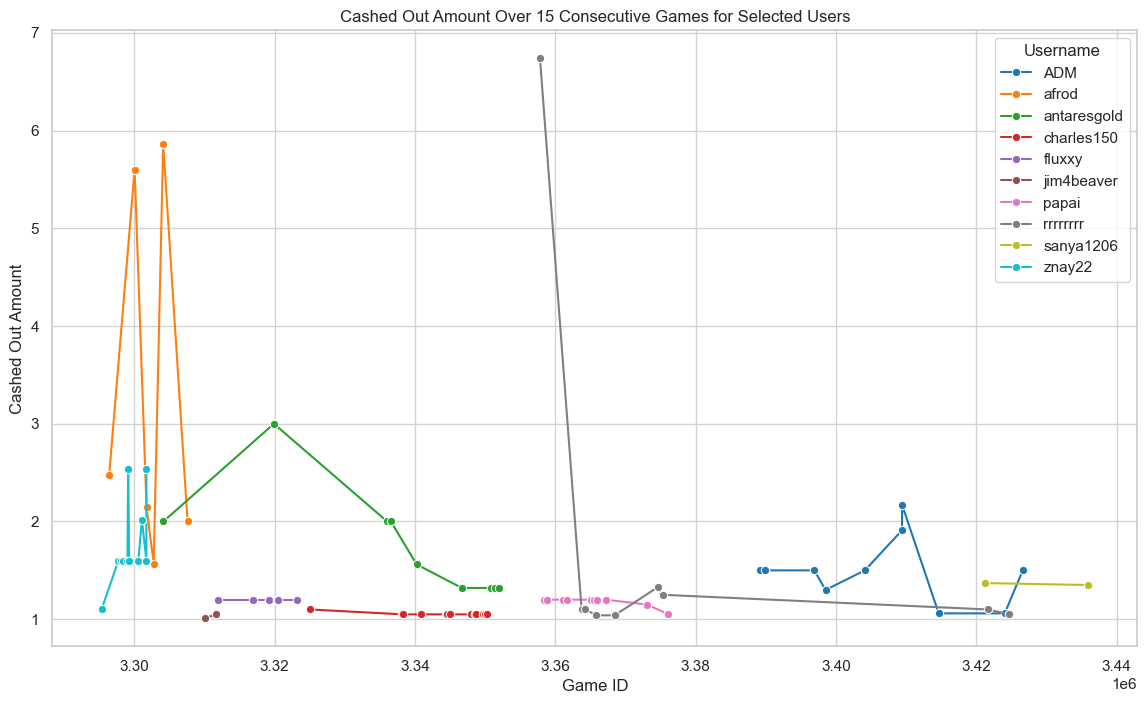

In [35]:
# Select 10 specific users
selected_users = df['Username'].unique()[:10]  # Adjust the selection as needed
filtered_df = df[df['Username'].isin(selected_users)]

# Sort by GameID to ensure consecutive games
filtered_df = filtered_df.sort_values(by=['Username', 'GameID'])

# Group by Username and then take the first 15 games for each user
top_15_games = filtered_df.groupby('Username').head(15)

# Set up the plot background with a grid that resembles boxes
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # This sets a grid background
palette = sns.color_palette("tab10")  # Use a palette with distinguishable colors

# Plotting
sns.lineplot(data=top_15_games, x='GameID', y='CashedOut', hue='Username', marker='o', palette=palette)

# Customizing the appearance
plt.title('Cashed Out Amount Over 15 Consecutive Games for Selected Users')
plt.xlabel('Game ID')
plt.ylabel('Cashed Out Amount')
plt.legend(title='Username')
plt.grid(True, linestyle='-', linewidth=1, color='lightgray')  # Thicker gridlines for box effect

# Add background boxes
plt.gca().set_facecolor('white')  # Light grey background

plt.show()


<h2>2. Imputation Using User Cashed Out Behavior</h2>

<p>To handle missing cashed out values, users are classified based on their cashed out consistency:</p>

<p><strong>Regular Cashed Out Users:</strong> Users with low variability in cashed out amounts, where the standard deviation (<code>CashedOut_std</code>) is less than half of the mean cashed out amount (<code>CashedOut_mean</code>). Missing values for these users are filled with the median cashed out amount, reflecting their consistent behavior.</p>

<p><strong>Spontaneous Cashed Out Users:</strong> Users with high variability in cashed out amounts. Missing values for these users are filled with the mean cashed out amount, accounting for their less predictable cashed out patterns.</p>

<p>This classification ensures that the imputation method aligns with the user’s cashed out behavior.</p>


In [37]:
user_stats = df.groupby('Username')['CashedOut'].agg(['mean', 'median', 'std']).reset_index()
user_stats.columns = ['Username', 'CashedOut_mean', 'CashedOut_median', 'CashedOut_std']

# Step 2: Classify users based on the standard deviation of cashed out amounts
user_stats['Betting_Type'] = np.where(
    user_stats['CashedOut_std'] < user_stats['CashedOut_mean'] / 2,  # Example threshold for regular betting
    'Regular',
    'Spontaneous'
)

# Step 3: Merge classification with original data
df = df.merge(user_stats[['Username', 'Betting_Type', 'CashedOut_mean', 'CashedOut_median']], on='Username', how='left')

# Step 4: Impute missing cashed out amounts based on user classification
def impute_cashed_out(row):
    if pd.isna(row['CashedOut']):
        if row['Betting_Type'] == 'Regular':
            return row['CashedOut_mean']
        elif row['Betting_Type'] == 'Spontaneous':
            return row['CashedOut_median']
    return row['CashedOut']

df['CashedOut'] = df.apply(impute_cashed_out, axis=1)
df = df.drop(columns=['CashedOut_mean', 'CashedOut_median'])

print(df)

             Id   GameID      Username   Bet  CashedOut  Bonus  Profit  \
0      14196549  3366002         papai     5   1.200000    0.0    1.00   
1      10676217  3343882        znay22     3   1.456333    NaN     NaN   
2      15577107  3374646      rrrrrrrr     4   1.330000    3.0    1.44   
3      25732127  3429241     sanya1206    10   1.360000    NaN     NaN   
4      17995432  3389174           ADM    50   1.500000    1.4   25.70   
...         ...      ...           ...   ...        ...    ...     ...   
49995  21345100  3406167        ElenaV     4  10.000000    NaN     NaN   
49996   1461408  3302415      Sandboxx  3000   1.040000    0.0  120.00   
49997  19704592  3398419       Ferreck     1   1.161134    NaN     NaN   
49998  20075463  3400278        ugneri    68   1.330000    0.0   22.44   
49999  14739654  3369631  ALIEN_SULACO   300   1.300000    0.0   90.00   

       BustedAt                  PlayDate Betting_Type  
0          8.24 2016-11-20 19:44:19+00:00      Regular

In [38]:
df.isnull().sum()

Id                  0
GameID              0
Username            0
Bet                 0
CashedOut        1465
Bonus           21266
Profit          21266
BustedAt            0
PlayDate            0
Betting_Type        0
dtype: int64

In [39]:
global_mean = df['CashedOut'].mean()
df['CashedOut'] = df['CashedOut'].fillna(global_mean)
df.isnull().sum()

Id                  0
GameID              0
Username            0
Bet                 0
CashedOut           0
Bonus           21266
Profit          21266
BustedAt            0
PlayDate            0
Betting_Type        0
dtype: int64

<h2>Calculating the Bonus Pool Percentage</h2>
<p>
This code calculates the mean BONUS_POOL_PERCENTAGE across all games in the dataset. First, it filters the DataFrame to include only rows with non-null bonus values. Then, it defines a function <code>calculate_game_bonus_pool_percentage</code> to compute the percentage of the bonus pool relative to the total losing bets for each game. The function sums the bonuses and calculates the total losing bets, considering only those bets where the game had a positive cash-out and busted before the cash-out.Finally, the mean percentage across all games is calculated and displayed.
</p>


In [41]:
bonus_filled_df = df[df['Bonus'].notna()]

def calculate_game_bonus_pool_percentage(group):
    total_bonus_pool = group['Bonus'].sum()
    losing_bets_df = group[(group['CashedOut'] > 0) & (group['BustedAt'] <= group['CashedOut'])]
    total_losing_bets = losing_bets_df['Bet'].sum()
    
    if total_losing_bets > 0:
        return (total_bonus_pool / total_losing_bets) * 100
    else:
        return 0

game_bonus_percentages = df.groupby('GameID', group_keys=False).apply(lambda group: calculate_game_bonus_pool_percentage(group.drop(columns=['GameID'])))

mean_bonus_pool_percentage = game_bonus_percentages.mean()

print(f"The mean BONUS_POOL_PERCENTAGE across all games is {mean_bonus_pool_percentage:.2f}%")

The mean BONUS_POOL_PERCENTAGE across all games is 1.65%


/var/folders/jp/ksgt6m6s21q8p75h5f1v6jfc0000gn/T/ipykernel_13609/2590462443.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  game_bonus_percentages = df.groupby('GameID', group_keys=False).apply(lambda group: calculate_game_bonus_pool_percentage(group.drop(columns=['GameID'])))


<h1>Filling Missing Bonus Values</h1>
<p>This code addresses the issue of missing bonus values in the dataset by calculating and filling these values based on the proportion of total bets and the predefined <code>BONUS_POOL_PERCENTAGE</code>.</p>
<p>First, the code defines the <code>BONUS_POOL_PERCENTAGE</code> as a decimal value derived from the previously calculated percentage (0.03%). The total amount of losing bets, where the <code>CashedOut</code> value is greater than 0, is calculated for each group of games identified by <code>GameID</code>.</p>
<p>The bonus pool is then determined by applying the <code>BONUS_POOL_PERCENTAGE</code> to the total losing bets. For each player with a missing bonus value, where <code>CashedOut</code> is greater than 0, their share of the bonus pool is calculated based on their proportion of the total bets within the same game group.</p>
<p>Finally, the DataFrame is updated with the calculated bonus values, and any remaining missing values are checked to ensure completeness.</p>

In [43]:
missing_bonus_df = df[df['Bonus'].isna()]

def calculate_bonus(group):
    total_losing_bets = group.loc[group['CashedOut'] > 0, 'Bet'].sum()
    bonus_pool = total_losing_bets * mean_bonus_pool_percentage
    
    for idx, row in group.iterrows():
        if pd.isna(row['Bonus']) and row['CashedOut'] > 0:
            total_bets = group['Bet'].sum()
            player_bonus = (row['Bet'] / total_bets) * bonus_pool
            df.at[idx, 'Bonus'] = player_bonus

df.groupby('GameID').apply(calculate_bonus,include_groups=False)

df.isnull().sum()

Id                  0
GameID              0
Username            0
Bet                 0
CashedOut           0
Bonus               0
Profit          21266
BustedAt            0
PlayDate            0
Betting_Type        0
dtype: int64

<h2>Filling Missing Profit Values</h2>
<p>
This code calculates the profit for rows in the DataFrame where the <code>Profit</code> column is null. The profit for each row is determined using the formula: <code>Profit = CashedOut - Bet + Bonus</code>. This formula calculates the net gain or loss by subtracting the bet amount from the cashed-out amount and then adding any bonus received. The code filters the DataFrame to identify rows with missing profit values, applies the profit calculation to these rows, and updates the <code>Profit</code> column accordingly. This ensures that all rows have their profit values computed and filled in as needed.
</p>


In [45]:
def calculate_profit(row):
    return row['CashedOut'] - row['Bet'] + row['Bonus']

df.loc[df['Profit'].isna(), 'Profit'] = df[df['Profit'].isna()].apply(calculate_profit, axis=1)

df.isnull().sum()

Id              0
GameID          0
Username        0
Bet             0
CashedOut       0
Bonus           0
Profit          0
BustedAt        0
PlayDate        0
Betting_Type    0
dtype: int64

<h1>Feature Engineering</h1>


<h4><strong>1.Bonus Impact</strong></h4>
<P><strong>Category: Interaction Feature</strong></P>
<p>This feature measures the impact of the bonus on the player's net outcome, relative to the difference between the cashed-out value and the initial bet.It quantifies how significantly the bonus affects the player's financial result compared to the difference between the cashed-out amount and the initial bet. 
</p>

In [101]:
df['BonusImpact'] = (df['Bonus'] * df['Bet']) / (df['CashedOut'] - df['Bet'])
df['BonusImpact'] = df['BonusImpact'].fillna(0)

<h4><strong>2.Time Of Day</strong></h4>
<p><strong>Category: Temporal Feature</strong></p>
<p>This feature extracts the hour of the day from the PlayDate timestamp, representing when the game was played.Time-based features often reveal patterns in player behavior. For instance, players might have different betting behaviors or risk appetites at different times of the day. Incorporating the hour of play can help in capturing these temporal patterns, potentially improving the model’s predictive power.
</p>

In [50]:
df['PlayDate'] = pd.to_datetime(df['PlayDate'])
df['TimeOfDay'] = df['PlayDate'].dt.time

<h4><strong>3. Profit To Bet Ratio</strong></h4>
<P><strong>Category: Normalized Measure</strong></P>
<p>This feature calculates the ratio of profit to the bet amount for each game round. It provides a normalized measure of profitability relative to the bet size. This helps in understanding how effectively the bet amount translates into profit, which can be useful for comparing outcomes across different bet sizes.
</p>

In [52]:
df['ProfitToBetRatio'] = df['Profit'] / df['Bet']

<h4><strong>5. Bonus x TimeOfDay</strong></h4>
<P><strong>Category: Polynomial Interaction Feature</strong></P>
<p>The <code>Bonus_TimeOfDay</code> captures the interaction between bonus amounts and the time of day, which can reveal patterns of bonus effectiveness depending on the time.</p>


In [54]:
df['PlayDate'] = pd.to_datetime(df['PlayDate'])
df['TimeOfDay'] = df['PlayDate'].dt.hour

df['Bonus_TimeOfDay'] = df['Bonus'] * df['TimeOfDay']

<h4><strong>4. Log Bet</strong></h4>
<P><strong>Category: Logarithmic Transformation</strong></P>
<p>The <code>LogBet</code> normalizes the bet amounts, making extreme values less influential and helping the model focus on relative differences.</p>

In [56]:
df['LogBet'] = np.log(df['Bet'].replace(0, np.nan))  # Replace 0s with NaN to avoid log(0) issues

<h4><strong>5. Relative Multiplier</strong></h4>
<P><strong>Category: Behavioral Metric</strong></P>
<p>The <code>RelativeMultiplier</code> feature measures the ratio of the multiplier at which the player cashed out to the multiplier at which the game busts. A higher <code>RelativeMultiplier</code> suggests a more aggressive strategy, as the player cashed out well above the bust point. A lower value indicates a more conservative approach. This feature helps analyze player behavior and enhances the model’s ability to predict and understand player strategies.</p>


In [58]:
df['RelativeMultiplier'] = df['CashedOut'] / df['BustedAt']

<h4><strong>5.  Categorical & Ordinal Encoding for Time of Day</strong></h4>
<P><strong>Category: Categorical & Ordinal Encoding</strong></P>
<p>The <code>TimeOfDayCategory</code> converts the hour of the day into categories, allowing the model to detect different behavioral patterns during distinct periods of the day.</p>
<code>time_of_day_mapping</code>defines the ordinal relationship among the time-of-day categories. Here, 'Morning' is mapped to 1, 'Afternoon' to 2, and so on, reflecting the natural sequence of time.


In [60]:
def categorize_time_of_day(time_obj):
    hour = time_obj.hour  # Extract the hour from the datetime.time object
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['PlayDate'] = pd.to_datetime(df['PlayDate'])

df['TimeOfDay'] = df['PlayDate'].dt.time

df['TimeOfDayCategory'] = df['TimeOfDay'].apply(categorize_time_of_day)

time_of_day_mapping = {
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
}

# Map the categories to ordinal values
df['TimeOfDayOrdinal'] = df['TimeOfDayCategory'].map(time_of_day_mapping)

In [61]:
df.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Betting_Type,BonusImpact,TimeOfDay,ProfitToBetRatio,Bonus_TimeOfDay,LogBet,RelativeMultiplier,TimeOfDayCategory,TimeOfDayOrdinal
0,14196549,3366002,papai,5,1.200000,0.000000,1.000000,8.24,2016-11-20 19:44:19+00:00,Regular,-0.000000,19:44:19,0.200000,0.000000,1.609438,0.145631,Evening,3
1,10676217,3343882,znay22,3,1.456333,4.958559,3.414892,1.40,2016-11-14 14:21:50+00:00,Regular,-9.636586,14:21:50,1.138297,69.419824,1.098612,1.040238,Afternoon,2
2,15577107,3374646,rrrrrrrr,4,1.330000,3.000000,1.440000,3.15,2016-11-23 06:39:15+00:00,Spontaneous,-4.494382,06:39:15,0.360000,18.000000,1.386294,0.422222,Morning,1
3,25732127,3429241,sanya1206,10,1.360000,16.528529,7.888529,1.63,2016-12-08 18:13:55+00:00,Regular,-19.130242,18:13:55,0.788853,297.513530,2.302585,0.834356,Evening,3
4,17995432,3389174,ADM,50,1.500000,1.400000,25.700000,2.29,2016-11-27 08:14:48+00:00,Regular,-1.443299,08:14:48,0.514000,11.200000,3.912023,0.655022,Morning,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Id                  50000 non-null  int64              
 1   GameID              50000 non-null  int64              
 2   Username            50000 non-null  object             
 3   Bet                 50000 non-null  int64              
 4   CashedOut           50000 non-null  float64            
 5   Bonus               50000 non-null  float64            
 6   Profit              50000 non-null  float64            
 7   BustedAt            50000 non-null  float64            
 8   PlayDate            50000 non-null  datetime64[ns, UTC]
 9   Betting_Type        50000 non-null  object             
 10  BonusImpact         50000 non-null  float64            
 11  TimeOfDay           50000 non-null  object             
 12  ProfitToBetRatio    50000 non-nu

<h1>Data Visualisation</h1>

<h3>Scatter Plots: Relationship Between Features and Target Variable (Profit)</h3>

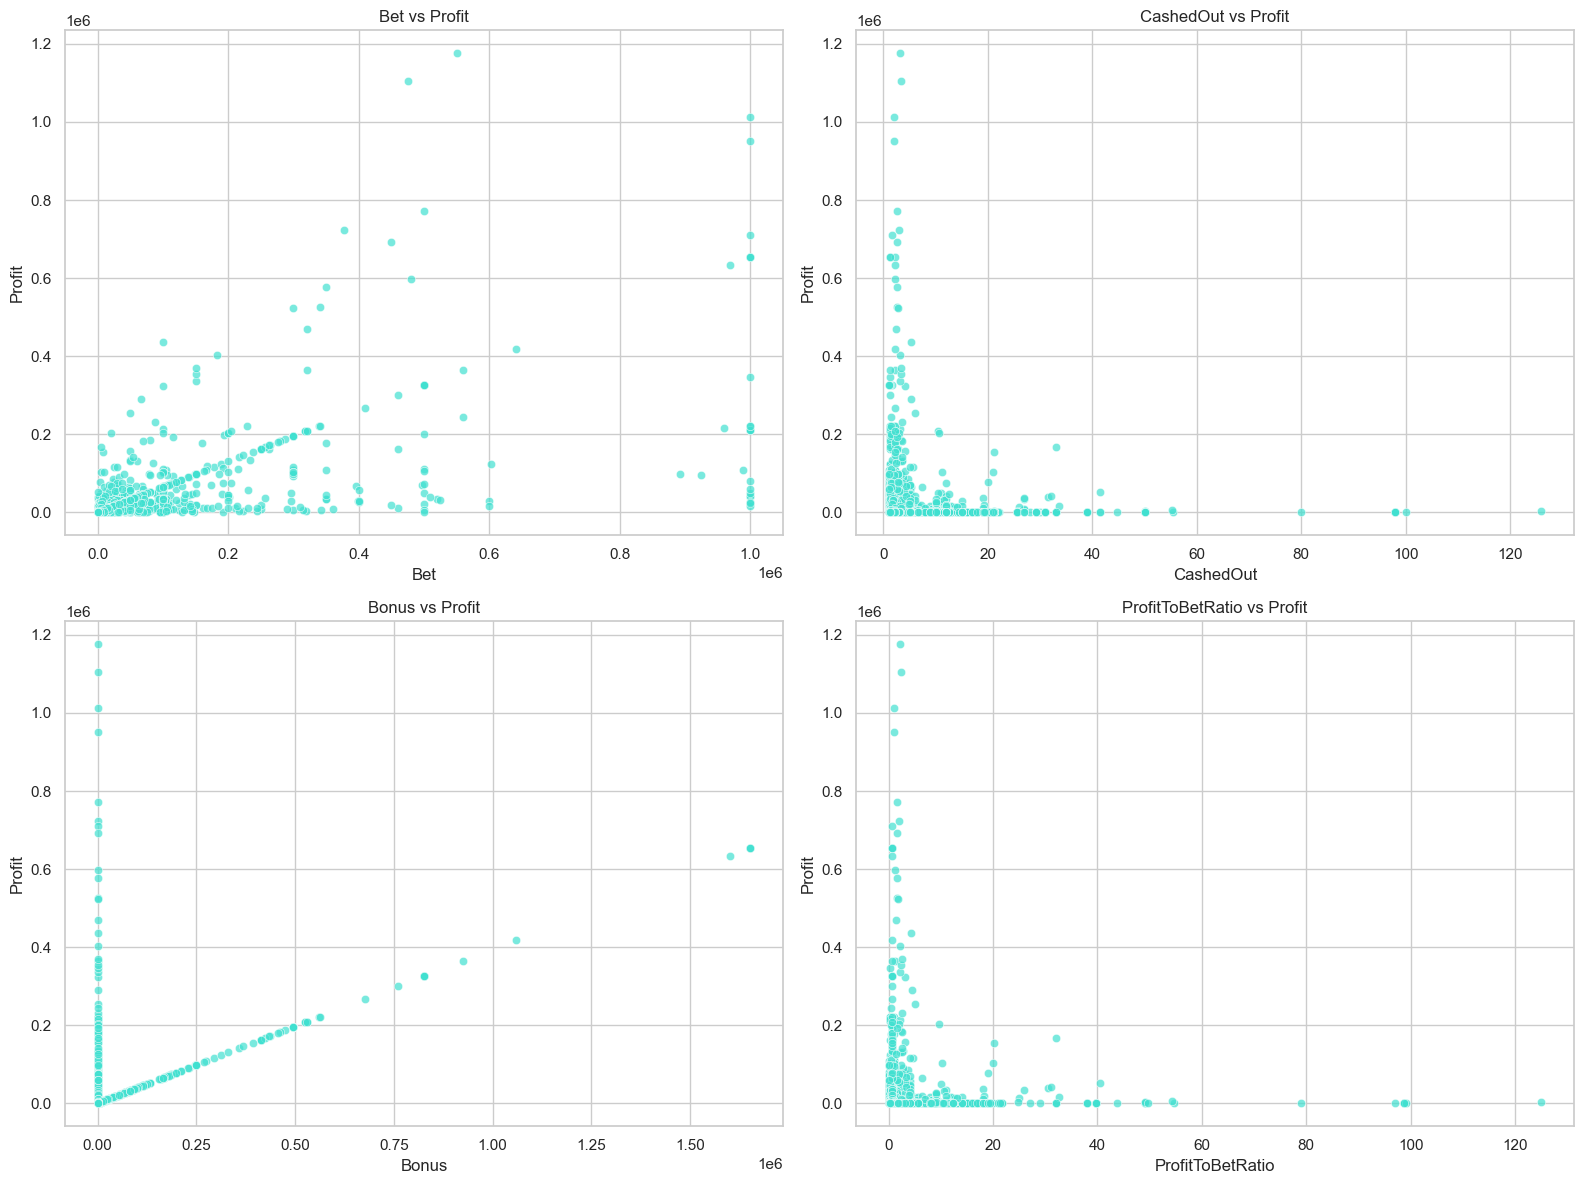

In [65]:
sns.set(style="whitegrid")
palette = "BuPu"
ig, axes = plt.subplots(2, 2, figsize=(16, 12))
features = ['Bet', 'CashedOut', 'Bonus', 'ProfitToBetRatio']
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='Profit', ax=axes[i//2, i%2], color='turquoise', alpha=0.7)
    axes[i//2, i%2].set_title(f'{feature} vs Profit')
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('Profit')

plt.tight_layout()
plt.show()

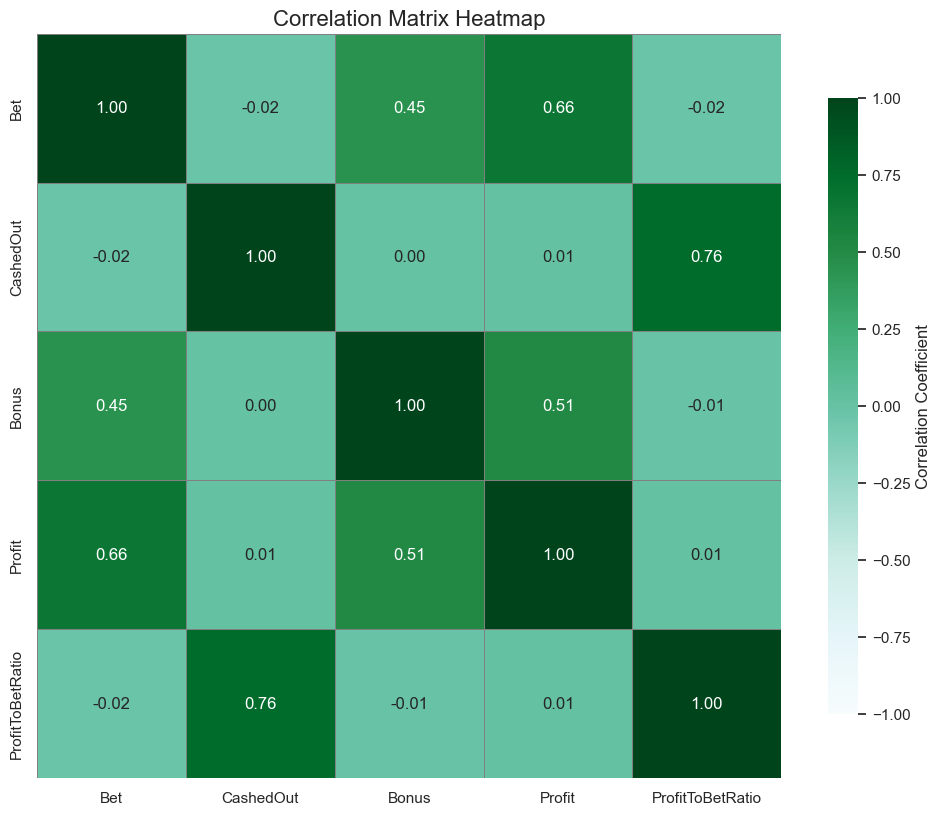

In [66]:
corr = df[['Bet', 'CashedOut', 'Bonus', 'Profit', 'ProfitToBetRatio']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    corr, 
    annot=True, 
    cmap='BuGn', 
    vmin=-1, 
    vmax=1, 
    center=0, 
    fmt='.2f', 
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

#### __Interpretations of Scatter Plots: Relationship Between Features and Profit__
1. As the Bet amount increases, there is a noticeable spread in Profit.
2. The plot reveals that CashedOut amounts have a negative relationship with Profit, indicating that higher cash-outs tend to be associated with lower profits.
3. There appears to be a positive correlation between Bonus and Profit, with higher bonuses generally associated with higher profits.
4. The plot suggests a negative relationship between ProfitToBetRatio and Profit, with higher ratios often correlating with lower profits. 


<h3>Count Plot of Betting_Type</h3>

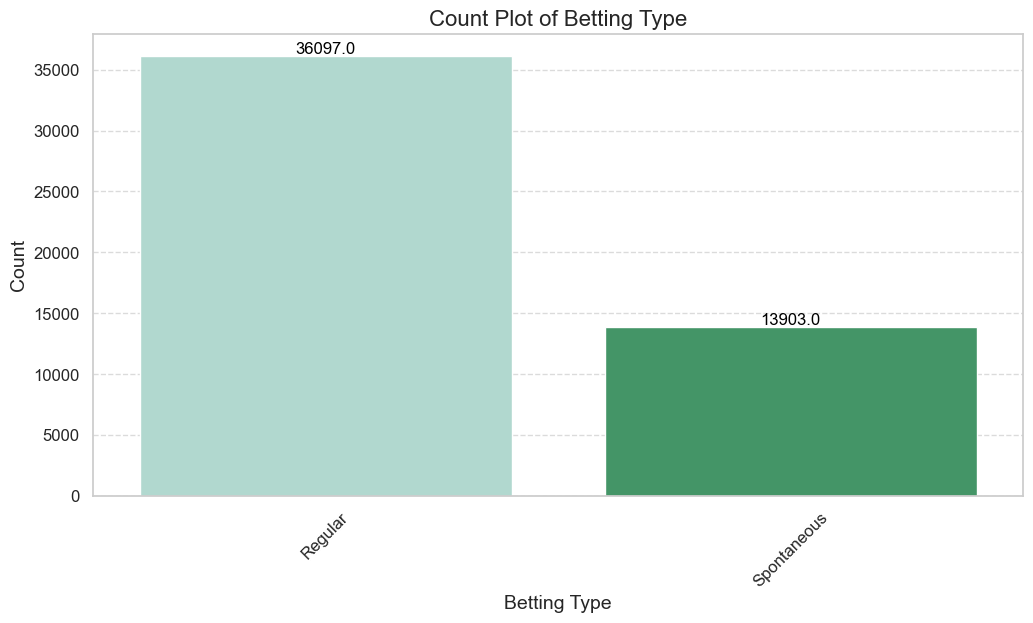

In [69]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Betting_Type', hue='Betting_Type', palette='BuGn', legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=12, 
                color='black')

plt.title('Count Plot of Betting Type', fontsize=16)
plt.xlabel('Betting Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### __Interpretation of Count Plot: Distribution of Betting Type__
The plot provides a clear visual representation of the distribution of various Betting_Type values. Each bar represents the count of occurrences for a specific betting type.

<h3>Box Plots: Identifying Outliers</h3>

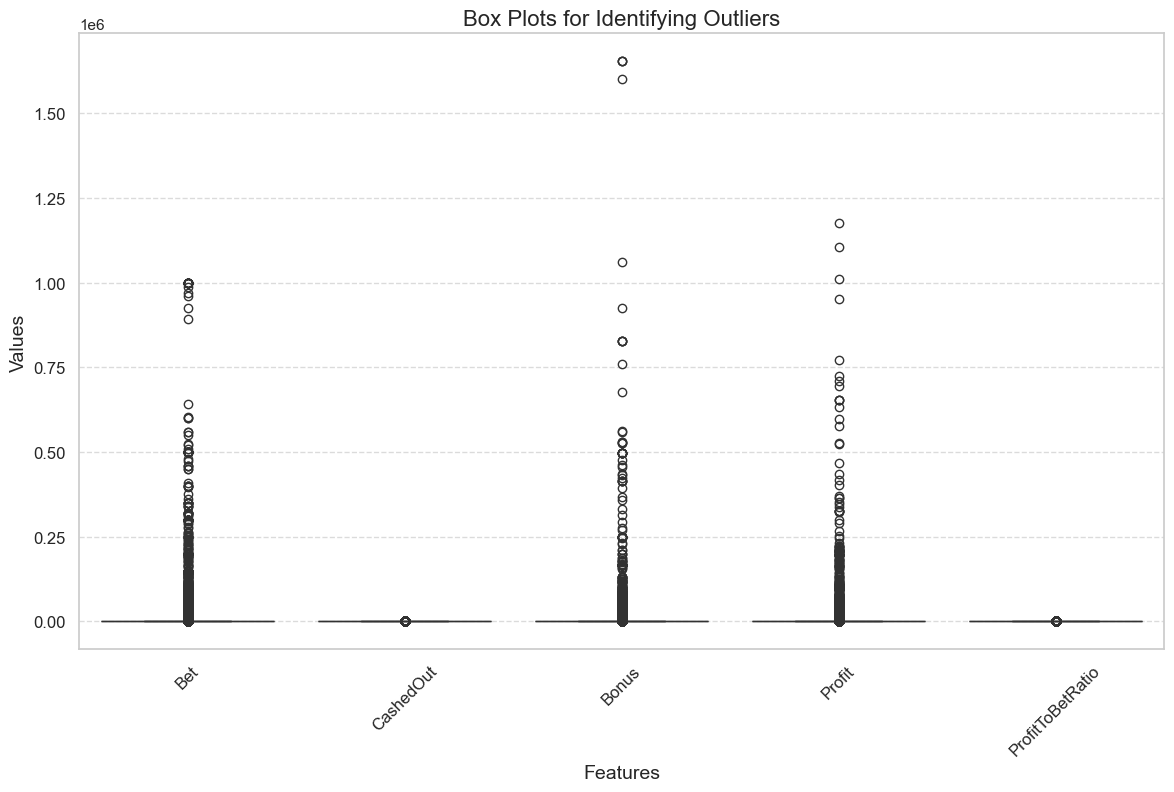

In [72]:
sns.set(style="whitegrid")

palette = sns.color_palette("BuPu", n_colors=len(df[['Bet', 'CashedOut', 'Bonus', 'Profit', 'ProfitToBetRatio']].columns))

plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=df[['Bet', 'CashedOut', 'Bonus', 'Profit', 'ProfitToBetRatio']], palette=palette)

plt.title('Box Plots for Identifying Outliers', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### __Box Plot Interpretation: Identifying Outliers__
This box plot identifies outliers for the features Bet, CashedOut, Bonus, Profit, and ProfitToBetRatio. Most values are clustered near the lower end, particularly for Bet, Bonus, and Profit, with a few significant outliers indicating very high values. CashedOut and ProfitToBetRatio show minimal outliers, suggesting that these features generally have smaller, more consistent values, with rare exceptions.

<h3>Correlation Matrix Heatmap</h3>

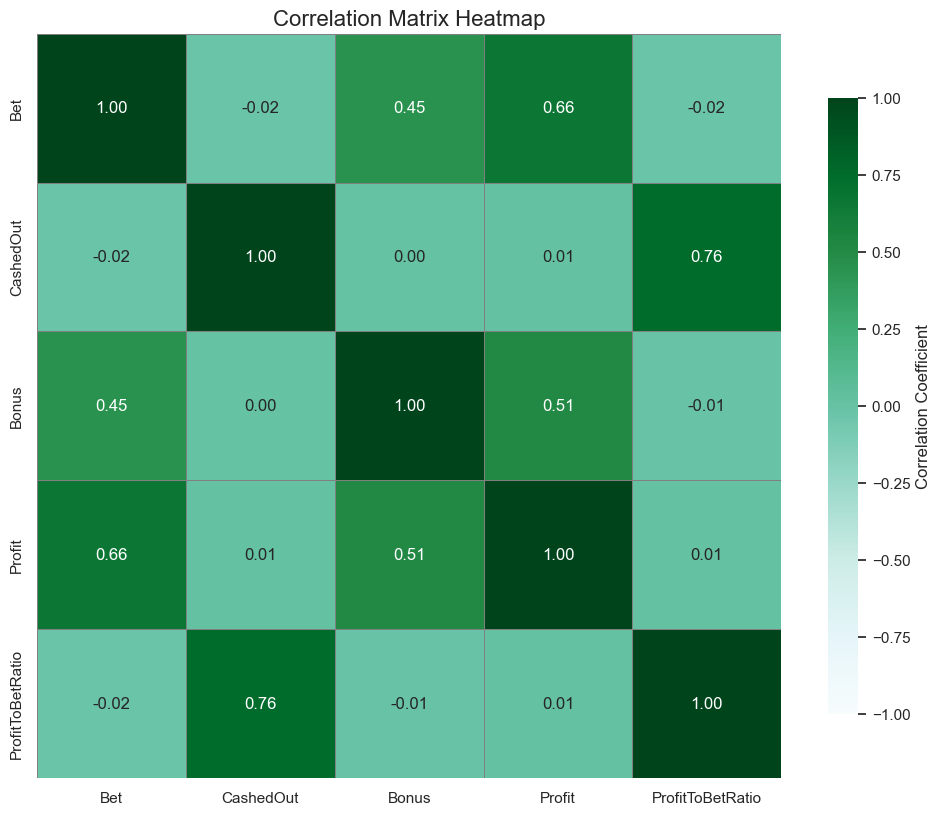

In [75]:
sns.set(style="whitegrid")

corr = df[['Bet', 'CashedOut', 'Bonus', 'Profit', 'ProfitToBetRatio']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    corr, 
    annot=True, 
    cmap='BuGn', 
    vmin=-1, 
    vmax=1, 
    center=0, 
    fmt='.2f', 
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


#### __Correlation Matrix Heatmap Interpretation__
This heatmap displays the correlation between features: Bet, CashedOut, Bonus, Profit, and ProfitToBetRatio ultimately  guiding feature selection and understanding feature interactions.
1. Correlation Coefficients: Ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), indicating the strength and direction of relationships.
2. Annotations: Provide exact correlation values for clarity.
3. Color Gradient: Shows the strength of correlations, with darker colors indicating stronger correlations.
4. Grid Lines: Improve readability of the matrix.


This correlation matrix heatmap shows the relationships between the features Bet, CashedOut, Bonus, Profit, and ProfitToBetRatio. Darker shades indicate stronger correlations. Bet and Profit have a strong positive correlation (0.66), suggesting that higher bets are associated with higher profits. CashedOut is moderately correlated with ProfitToBetRatio (0.76), indicating that higher cash-outs are linked to a better profit-to-bet ratio. Bonus shows a moderate correlation with both Bet (0.45) and Profit (0.51), suggesting some connection between bonuses, bets, and profits. The other correlations are weak, close to zero, indicating little to no linear relationship.

## Regression Modelling

 ### Data Preparation
This code snippet prepares the dataset for regression modeling by splitting it into training and testing sets. It also standardizes the features using StandardScaler to ensure that all features contribute equally to the model training.<br>
**Bet:** Represents the amount wagered, which directly impacts potential profit.<br>
**CashedOut:** Indicates the amount of money taken out before the end of the bet, affecting overall profit.<br>
**Bonus:** Refers to additional rewards that could influence profitability.<br>
**ProfitToBetRatio:** Measures the efficiency of betting by comparing profit to the amount bet, providing a normalized view of profitability.

In [79]:
X = df[['Bet', 'CashedOut', 'Bonus', 'ProfitToBetRatio']] 
y = df['Profit'] 

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression
Linear regression analysis is used to predict the value of a variable based on the value of another variable. The

In [82]:
# Define the custom RMSE function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate performance
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}, R²: {r2_lr:.2f}')

Linear Regression - RMSE: 15457.05, MAE: 957.67, R²: 0.48


##  Ridge Regression
Ridge regression is a statistical regularization technique. It corrects for overfitting on training data in machine learning models.

In [86]:
# Set up the parameter grid
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}

# Initialize Grid Search
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)

# Best model
best_ridge = grid_ridge.best_estimator_

# Predict and evaluate
y_pred_ridge = best_ridge.predict(X_test)

# Calculate RMSE without the deprecated 'squared' parameter
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - RMSE: {rmse_ridge:.2f}, MAE: {mae_ridge:.2f}, R²: {r2_ridge:.2f}')

Ridge Regression - RMSE: 15462.01, MAE: 959.65, R²: 0.48


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Lasso Regression
Lasso regression is a regularization technique that applies a penalty to prevent overfitting and enhance the accuracy of statistical models.

In [88]:
# Set up the parameter grid
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}

# Initialize Grid Search
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)

# Best model
best_lasso = grid_lasso.best_estimator_

# Predict and evaluate
y_pred_lasso = best_lasso.predict(X_test)

# Calculate RMSE using the recommended method
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - RMSE: {rmse_lasso:.2f}, MAE: {mae_lasso:.2f}, R²: {r2_lasso:.2f}')

Lasso Regression - RMSE: 15474.41, MAE: 972.87, R²: 0.48


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Decision Tree Regression
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [91]:
# Set up the parameter grid
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Randomized Search
random_tree = RandomizedSearchCV(
    DecisionTreeRegressor(), 
    param_distributions=param_grid_tree, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42
)
random_tree.fit(X_train, y_train)

# Best model
best_tree = random_tree.best_estimator_

# Predict and evaluate
y_pred_tree = best_tree.predict(X_test)

# Calculate RMSE using the recommended method
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Regression - RMSE: {rmse_tree:.2f}, MAE: {mae_tree:.2f}, R²: {r2_tree:.2f}')

Decision Tree Regression - RMSE: 5708.38, MAE: 200.86, R²: 0.93


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Random Forest Regression
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [95]:
# Set up the parameter grid
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Randomized Search
random_forest = RandomizedSearchCV(RandomForestRegressor(), param_grid_forest, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_forest.fit(X_train, y_train)

# Best model
best_forest = random_forest.best_estimator_

# Predict and evaluate
y_pred_forest = best_forest.predict(X_test)
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest Regression - RMSE: {rmse_forest:.2f}, MAE: {mae_forest:.2f}, R²: {r2_forest:.2f}')

Random Forest Regression - RMSE: 6978.05, MAE: 194.20, R²: 0.89


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<table style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="text-align: left; padding-left: 0;">Model</th>
      <th style="text-align: left; padding-left: 0;">RMSE</th>
      <th style="text-align: left; padding-left: 0;">MAE</th>
      <th style="text-align: left; padding-left: 0;">R²</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding-left: 0;">Linear Regression</td>
      <td style="padding-left: 0;">15457.05</td>
      <td style="padding-left: 0;">957.67</td>
      <td style="padding-left: 0;">0.48</td>
    </tr>
    <tr>
      <td style="padding-left: 0;">Lasso Regression</td>
      <td style="padding-left: 0;">15474.41</td>
      <td style="padding-left: 0;">972.87</td>
      <td style="padding-left: 0;">0.48</td>
    </tr>
    <tr>
      <td style="padding-left: 0;">Decision Tree Regression</td>
      <td style="padding-left: 0;">5741.93</td>
      <td style="padding-left: 0;">204.83</td>
      <td style="padding-left: 0;">0.93</td>
    </tr>
    <tr>
      <td style="padding-left: 0;">Ridge Regression</td>
      <td style="padding-left: 0;">15462.01</td>
      <td style="padding-left: 0;">959.65</td>
      <td style="padding-left: 0;">0.48</td>
    </tr>
      <tr>
      <td style="padding-left: 0;">Random Forest Regression</td>
      <td style="padding-left: 0;">6978.05</td>
      <td style="padding-left: 0;">194.20</td>
      <td style="padding-left: 0;">0.89</td>
    </tr>
  </tbody>
</table>


### Best Model
__Decision Tree Regression__ performed the best overall. It has the __lowest RMSE and MAE__, indicating that it makes predictions with the __smallest average error__. Additionally, it has the __highest R² score__, meaning it fits the data significantly better than the other models.
The other models (Linear Regression, Lasso Regression, and Ridge Regression) performed similarly in terms of RMSE, MAE, and R². However, Decision Tree Regression stands out due to its superior performance on all metrics.

#### __Why Decision Tree Regression worked well__
Decision Trees can model complex, non-linear relationships between the features and the target variable. Unlike Linear Regression, which assumes a linear relationship, Decision Trees can capture interactions between variables and model non-linear patterns in the data.